# Download data

download data: https://www.rondhuit.com/download.html

In [ ]:
!mkdir ./data
!wget  -O ./data/livedoor.tar.gz "https://www.rondhuit.com/download/ldcc-20140209.tar.gz"
! tar -xvzf ./data/livedoor.tar.gz

Streaming output truncated to the last 5000 lines.
text/smax/smax-6833065.txt
text/smax/smax-6833494.txt
text/smax/smax-6833579.txt
text/smax/smax-6834422.txt
text/smax/smax-6834562.txt
text/smax/smax-6834765.txt
text/smax/smax-6834990.txt
text/smax/smax-6835318.txt
text/smax/smax-6838218.txt
text/smax/smax-6838260.txt
text/smax/smax-6838332.txt
text/smax/smax-6838453.txt
text/smax/smax-6838514.txt
text/smax/smax-6838627.txt
text/smax/smax-6838702.txt
text/smax/smax-6842164.txt
text/smax/smax-6842219.txt
text/smax/smax-6842269.txt
text/smax/smax-6842402.txt
text/smax/smax-6842629.txt
text/smax/smax-6842882.txt
text/smax/smax-6843206.txt
text/smax/smax-6845003.txt
text/smax/smax-6847081.txt
text/smax/smax-6849018.txt
text/smax/smax-6850114.txt
text/smax/smax-6850391.txt
text/smax/smax-6850789.txt
text/smax/smax-6851590.txt
text/smax/smax-6851919.txt
text/smax/smax-6853063.txt
text/smax/smax-6853346.txt
text/smax/smax-6853751.txt
text/smax/smax-6854198.txt
text/smax/smax-6855347.txt
text

# Import modules

In [ ]:
import os
import re
from glob import glob
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

## Check data

In [ ]:
# get category_name
category_name = glob("./text/*")
category_name = [x.replace("./text/","") for x in category_name if '.txt' not in x]
category_name

['kaden-channel',
 'sports-watch',
 'livedoor-homme',
 'smax',
 'topic-news',
 'it-life-hack',
 'dokujo-tsushin',
 'movie-enter',
 'peachy']

In [ ]:
# check all file in category folder
# glob('./text/{}/*.txt'.format(category_name[0]))

In [ ]:
# check file detail (example)
file_name = glob('./text/{}/*.txt'.format(category_name[0]))[0]
with open(file_name) as text_file:
    text = text_file.read()
    print (text)

http://news.livedoor.com/article/detail/6357725/
2012-03-11T08:00:00+0900
グーグルプラスで衝撃！　AKB前田敦子が顔面センターをついに持ちネタ化し好感度アップ【話題】
顔のパーツがセンターに寄っているなど、ネットやテレビで言われていたAKB48の前田敦子。ファンからはそういった声に「ひどい！」とのコメントが上がっていたが、ここに来て本人がネタにしはじめた。グーグルプラスに前田が書き込んだのがこちら。

(　 　 　 　 ∵　 　 　 　 )あーお腹いっぱい♥ 


以前より、メンバーである篠田麻里子が前田をツイッターなどで表すときに「(´∵`)ノ」こういった顔文字を選んでいた。だが、今回前田が自分自身で選んだのはさらにパーツが中心に寄った「(　 　 　 　 ∵　 　 　 　 )」という顔文字。

これにネットでは「この子強い！」「なんかもう好きになっちゃった」と大騒ぎ。

開き直った感のある前田だが、好感度はアップした。


AKB前田敦子がネタにされファンが大激怒！　日本一下世話なクイズ番組がネットで話題に
「上からマリコ」はやっぱりサディスティックだった！　AKB前田敦子がツイッターでネタにされる
    

■関連記事
・フェイスブックで重婚発覚！　別居中の妻が旦那の新しい嫁を発見【話題】
・ネコでもわかる！「新しい」iPadはここが新しい!!【話題】
・ズバズバ発言するフィフィのツイッターが話題！「政治家になってほしい」の声も【話題】
・業界初！　アンドロイドスマホと連携の炊飯ジャー登場にびっくり【売れ筋チェック】
・日本に進出する中国家電メーカー！　OEM供給ではすっかり定着【話題】



# Process data

- first line is link and second line is datetime

- the beginning part of filenames are similar to the folder name

In [ ]:
def read_and_process_textfile_to_dataframe():
    data = pd.DataFrame()
    selected_category = category_name[0]
    article_list = []
    for selected_category in category_name:
        for file_name in glob('./text/{}/{}*.txt'.format(selected_category,selected_category)):
            with open(file_name) as text_file:
                # read all article
                article = text_file.readlines()
                # remove unnessesary symbol
                article = [re.sub(r'[\n \u3000]','', i) for i in article]
                # combine category, URL, datatime, title, details
                article_list.append([selected_category, article[0], article[1], article[2], ''.join(article[3:])])
            # break
    article_df = pd.DataFrame(article_list, columns=["category","url","log_time","title","document"])
    article_df["category_no"] = pd.factorize(article_df['category'])[0] + 1
    # save to pickle
    os.makedirs('output', exist_ok=True)
    article_df.to_pickle("./output/original_article_df.pkl")
    return article_df
article_df = read_and_process_textfile_to_dataframe()
article_df.head(2)

,category,url,log_time,title,document,category_no
0,kaden-channel,http://news.livedoor.com/article/detail/6357725/,2012-03-11T08:00:00+0900,グーグルプラスで衝撃！AKB前田敦子が顔面センターをついに持ちネタ化し好感度アップ【話題】,顔のパーツがセンターに寄っているなど、ネットやテレビで言われていたAKB48の前田敦子。ファンからはそういった声に「ひどい！」とのコメントが上がっていたが、ここに来て本人がネタにしはじめた。グーグルプラスに前田が書き込んだのがこちら。(∵)あーお腹いっぱい♥以前より、メンバーである篠田麻里子が前田をツイッターなどで表すときに「(´∵`)ノ」こういった顔文字を選んでいた。だが、今回前田が自分自身で選んだのはさらにパーツが中心に寄った「(∵)」という顔文字。これにネットでは「この子強い！」「なんかもう好きになっちゃった」と大騒ぎ。開き直った感のある前田だが、好感度はアップした。AKB前田敦子がネタにされファンが大激怒！日本一下世話なクイズ番組がネットで話題に「上からマリコ」はやっぱりサディスティックだった！AKB前田敦子がツイッターでネタにされる■関連記事・フェイスブックで重婚発覚！別居中の妻が旦那の新しい嫁を発見【話題】・ネコでもわかる！「新しい」iPadはここが新しい!!【話題】・ズバズバ発言するフィフィのツイッターが話題！「政治家になってほしい」の声も【話題】・業界初！アンドロイドスマホと連携の炊飯ジャー登場にびっくり【売れ筋チェック】・日本に進出する中国家電メーカー！OEM供給ではすっかり定着【話題】,1
1,kaden-channel,http://news.livedoor.com/article/detail/6108505/,2011-12-11T12:39:00+0900,洗濯したければゲームをクリアしろ！イギリスの学生が発明した洗濯機が楽しすぎる【話題】,コインランドリーで洗濯が出来上がる時間を楽しくゲームをしながら過ごせたらどうだろう。イギリスのキングストン大学の学生がおもしろいゲームをクリアしないと洗濯が完了しない洗濯機を発明した。「アミューズメント洗濯機」と名づけられたこの洗濯機は、１回３ポンド、およそ３６０円でプレイできる。ハンドルとボタンを操作し、ゲームをクリアしないと洗濯ができない。もし途中でゲームオーバーになった場合は追加の料金がかかる。つまり、１度でゲームがクリアできると安く洗濯が出来上がるが、そうでなければお金が多くかかるというわけだ。ゲームが苦手な人はいつまでも洗濯ができないかもしれないが、これで洗濯の時間が楽しくなりそうだ。Studentdesignsvideogamethatdoesthelaundry■関連記事・豪徳寺美鈴お気に入りのレンジはなに？「Kiss」で連載スタートの「家電の女」を読んでみた【話題】・QRコードが照明になった「WoodenQRCodeStool」がおしゃれすぎる【話題】・クリスマスはテレビを見よう！２３日はNHKスペシャル「世界を変えた男スティーブ・ジョブズ」が放送に【クリスマス】・GREEのアメリカでの本気に注目！開発要員を倍増へ【話題】・ツイッターやミクシィ、フェイスブックでかわいいクリスマスメッセージを送って被災地支援！【クリスマス】,1


In [ ]:
article_df.tail(2)

,category,url,log_time,title,document,category_no
7365,peachy,http://news.livedoor.com/article/detail/5083869/,2010-10-20T10:30:00+0900,韓方の力で乾燥知らずの肌へ！この秋注目の韓方コスメ,心地のいい秋の日々が続いています。出歩くには気持ちがいいのですが、手先のかさつきや、唇のひび割れなど、そろそろお肌の乾燥が気になり始める頃ではないでしょうか。韓国ではこの時期人気を集めるのが“韓方”コスメ。自然の成分を凝縮した韓方コスメは、高い保湿効果を発揮することから、アンチエイジングケアとして日本でも高い人気を誇っています。そこで今回は、今年の秋冬に注目を集めそうな韓方コスメをご紹介！新しく登場したものやリニューアルしたものなど、どれも保湿力に優れたものばかりです。■MISSIA（ミシャ）：美思金雪「美思」はミシャの中でも韓方コスメを展開するシリーズです。高い保湿効果を発揮する「超補養（チョボヤン）」や「エイヒョン」といった基礎化粧品ラインは、乾燥気味のお肌をしっとりと守ってくれるとして高い人気を呼んでいます。そんな「美思」シリーズから新しく登場したのが「金雪（クムソル）」。超補養ラインが集中保湿だとしたら、金雪ラインは肌の生命力回復に注目した、よりプレミアムなラインだと言えます。山参抽出物1％、鹿茸抽出物、靈芝抽出物、白両金抽出物など、なんと97種もの漢方成分を配合。水の代わりに人参水を100％使用し、純金も含まれているので高級感もアップ。肌に活力を与え、ハリのある明るい肌に導いてくれます。無色素、無パラベン、無鉱物性、無GMO、無トリクロサン。■秀麗韓（スリョハン）：秀麗韓シートマスクhttp://www.sooryehan.co.kr/４種類の漢方成分を発酵させた「酵」ラインなどが人気の秀麗韓。この秋は、漢方の成分をギュッと濃縮し、老化で力を失い始めたお肌など、さまざまな肌トラブルを解決してくれるシートマスクが登場しています。私たちの体は、「五行丹」（木火土金水）と深く関係しているという考えの元、機能に応じて五種類のタイプを展開。「火」は肌の生気を取り戻すザクロ抽出物、「金」は弾力を与える靈芝抽出物、「水」は肌にハリを与える発酵月見草など、肌機能の活性化とアンチエイジング効果を発揮します。■NATUREREPUBLIC（ネイチャーリパブリック）：発酵名家高い保湿効果を発揮する分、値段もややお高めな韓方系の基礎化粧品。「もっと気軽に使えたら…」と思っている人も多いはずですよね。そのような場合は、１０月から新登場したネイチャーリパブリックの「発酵名家」ラインはいかがでしょう？精製水の代わりに水の気運を呼び起こす靈芝茸の発酵水を１００％使用。冬虫夏草、松茸、桑黄きのこ、ドクダミ、白花蛇舌草、樺孔茸といった７種の素材を蜂蜜に漬けて熟成させ、鹿茸抽出物や純金成分が配合されています。濃縮された高栄養成分が肌の奥にまで届き、乾燥知らずのモチモチとした弾力のある肌に作り上げます。韓国の韓方コスメいかがでしたか？「韓方」とは漢方を材料として韓国が独自の方式で作ったものです。参鶏湯（サムゲタン）など食べ物にも使われていて、健康食品として広く親しまれています。今年の秋は、韓方コスメで乾燥知らずのお肌を目指してみてはいかがでしょう？（文：林由美）■その他の韓国コスメも要チェック！・科学の力で肌がよみがえる？韓国発最先端「幹細胞コスメ」に注目！（2010年10月13日）・フルーツの香りにお肌もうっとり、韓国のフルーツ系クレンジング（2010年10月04日）・優れた肌再成効果を発揮、韓国で話題の「かたつむりクリーム」をチェック！（2010年09月24日）・注射器に試験管！？韓国の医療用品型コスメでアンチエイジング！（2010年09月10日）・ダメージヘアを集中補修、韓国的なツヤツヤ美人髪をめざそう！（2010年08月20日）,9
7366,peachy,http://news.livedoor.com/article/detail/5428863/,2011-03-21T13:00:00+0900,香里奈に続け！モデル小林優美が女優デビュー,先日、ドラマ「美咲ナンバーワン!!」(NTV)の放送が終了した。このドラマは、香里奈が演じる六本木ナンバーワンホステス天王寺美咲が、ある切っ掛けで高校の教師に転身。問題児ばかりが集まる2年Z組の担任を押し付けられるも、そんな生徒たちと真っすぐに向き合い、絆を深めていくというストーリーだった。その最終回の中で、香里奈と後輩ホステス役の2人がファッションショーに出演するシーンがあったのだが、実はこれ、3月5日に代々木第一体育館で開催された「東京ガールズコレクション」(以下：TGC)にて収録されたもの。役の衣装に身を包んだ3人が、ランウェイを往復するという短いものだったのだが、その収録が終わるや否や、2年Z組の生徒たちがサプライズで登場。収録に協力してくれた会場にお礼を言うかのように、手を振りながらランウェイを練り歩いた。同日、主役の香里奈は収録とは別に、TGCの実際のモデルとしてもステージに立っていた訳だが、ドラマ出演者の中にもう一人、モデルとして登場していた娘がいる。それは後輩ホステスのまりえ役を演じた小林優美だ。実は彼女、香里奈が看板モデルとなっている女性ファッション誌「Ray」のモデル。現実の世界でも後輩なのだ。そんな彼女の芸歴は意外にも長く、デビューは02年。ローティーン向けファッション雑誌「ラブベリー」の専属モデルを3年間務めたのち、06年に開催された「神戸コレクション」のモデルオーディションに挑戦。ファイナリストとに選ばれる。その後、07年にはアイドルの登竜門、ミスマガジンで「Gyao賞」を獲得。前後して水着中心のイメージDVDを3枚もリリースし、アイドル的な活動も始める。さらに09年にはアサヒビールのキャンペーンガールに選ばれ、2010年はTGCにステージモデルとして初出演。そして今回、このドラマで女優デビューを果たしたという訳だ。アイドル、モデル、キャンペーンガール、そして女優と、着実にステップを踏んできた小林優美。このドラマを切っ掛けに、香里奈に続くことができるのか！？今後の活躍に期待が高まる。(文・写真／矢沢隆則)■関連サイト・小林優美-公式ブログ・美咲ナンバーワン!!-公式サイト・東京ガールズコレクション-公式サイト,9


# Doc2vec

In [ ]:
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# get original article data from pickel file
article_df = pd.read_pickle("./output/original_article_df.pkl")
sentences = article_df["document"].values.tolist()
category_no = article_df["category_no"].values

In [ ]:
%time
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sentences)]
model = Doc2Vec(documents, vector_size=2, window=5, min_count=1, workers=4)
model.save('./output/doc2vec_model.model')
model

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [ ]:
len(documents)

7367

In [ ]:
model.docvecs[5792]

array([-0.97906077,  0.24172617], dtype=float32)

In [ ]:
model.docvecs#.most_similar(5792)

In [ ]:
sentences[5792]

'大ヒットシリーズ『バイオハザード』の最新作『バイオハザードV：リトリビューション』。前作同様ポール・W・S・アンダーソン監督が自らメガホンを取り、ミラ・ジョボヴィッチが主演する、今年最大のSFアクション大作のひとつだ。これまで日本を舞台にしていることがわかる場面写真や、ティーザー予告編、US版ポスタービジュアルなどが公開されてきた。また、アメリカではシリーズを通して重要な役割を果たす“アンブレラ社”の公式サイトがウェブ上にアップされるなど話題を振りまいていたものの、まだまだその多くは謎に包まれていた。しかし9月の公開を控え、本国アメリカでは14日（日本時間）にニューヨークのリーガルシネマでファンイベントが行なわれ、主演のミラ・ジョヴォヴィッチが登壇。ファンの質問に直接答え、その模様は世界各国でWEB中継された。そして、日本版最新予告編もついに解禁。徐々にその全貌が明らかになりつつある。新たに公開された映像の冒頭では、ジョヴォヴィッチ演じる主人公アリスがなんと主婦として登場。これまでのシリーズでは、世界中に“人間をアンデッドに変える”T-ウィルスが蔓延、人類のほとんどが死滅し世界は荒廃しきっていたはずだ。また、前作までで死亡したはずのキャラクター達も総登場しているのがわかる。シリーズ第一作で登場したアンブレラ社の特殊部隊隊員レイン(ミッシェル・ロドリゲス)や、ファンの間では名シーンとして知られる“レーザートラップ”で死亡したワン隊長(コリン・サーモン)、そしてやはり第三作で壮絶な爆死を遂げたカルロス・オリヴェイラ(オデット・フェール)などお馴染みのキャラクター達だ。さらにはシリーズ最強の敵としてお馴染みアルバート・ウェスカーまで再び姿を現している。いったいこの人物たちはどのような形で登場するのであろうか。ますます謎が深まる。さらには原作であるゲーム「バイオハザード」シリーズに登場したレオン・S・ケネディや、エイダ・ウォンとおぼしき東洋人も登場。映画版ファンのみならず、ゲームファンも胸を熱くする映像が満載だ。また、日本からは前回も登場した中島美嘉が再びアンデッドとして登場することが決定。今回はなんとミラ・ジョボヴィッチと直接対決し、アクションシーンにも挑戦している。日本を舞台に彼女がどのような活躍を見せるのかも気になるところだ。期待が高まるなか、新たな情報を待つより他

In [ ]:
sentences[7054]

'皆さんは、ブタが「幸福のシンボル」と呼ばれていることを知っていますか？ドイツを始め欧米では、ブタは豊かな食生活をもたらすことから、誕生日や旅立ちの時にブタのフィギュアを手渡すなど、お守りのように広く親しまれているのだそうです。松屋銀座オリジナル「幸福のブタ」チョコレートは今年で8年目を迎え、毎年大評判を呼んでいます。今年の幸福のブタのデザインを手掛けるのは、デザイナーのすずきあさこさん。定番人気のブタチョコのほか、新ブランドまで合わせて7ブランドのブタチョコレートがお目見えします。ユーモラスなブタさんのチョコレートを見たら、誰でもほっこりしてしまうはず。仲良しの女友達や家族にプレゼントして、幸せを運んでもらいましょう。＜5thアヴェニューチョコラティア＞■3匹の子ブタセット1,470円ニューヨークからやってきた可愛い３匹の子ブタ達。ベルギー産の上質なカカオをたっぷり使ったミルクチョコレートは見て楽しく食べて美味しいチョコレート。スティックつきのロリポップタイプです。＜エコール・クリオロ＞■プチ・コッション1,890円（限定200個）人気パティスリー、エコール・クリオロが松屋だけのために作ったオリジナルチョコレート。濃厚なコクのあるキャラメルを使用したミルクキャラメルとカカオ分66％のチョコレートを使用したブラックの2種類のチョコレートセットです。丸々とした愛らしい子ブタ達は、なんと、ショコラティエが一つ一つ手書きしているのだそう！＜テオブロマ＞■コショネ893円土屋シェフが作る松屋限定のチョコ。フェミニンなピンクに彩られた、かわいいブタが5匹整列！やさしいイチゴのショコラです。＜トゥット・ベーネ＞■2010ミスハッピー1,575円洗練された芳香と力強いカカオ風味のチョコレートに、すずきあさこさんデザインの「2010幸福のブタ」キャラクターをプリントしました。＜デメル＞■愉快なラブラブータ1,365円ひょうひょうとした表情が、なんともユーモラス！デメルの幸福のブタの新作は、不景気を吹き飛ばすブタのコンビです。その他、定番人気の「ぶたはなクッキー」（1,995円）、「仔ぶたのチーム」（1,890円）、「仔ぶたのトリオ」（2,100円）と、姿もおいしさもバラエティに富んでいます。＜BABBI（バビ）＞■松屋限定クリスタルパッケージクリア1,100円サクサクの食感が大人気

In [ ]:
vector_result_list = []
for i in range(len(documents)):
    vector_result = model.docvecs[i]
    vector_result_list.append(vector_result)
# vector_result_list

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(vector_result_list)
tsne_results

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7367 samples in 0.020s...
[t-SNE] Computed neighbors for 7367 samples in 0.190s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7367
[t-SNE] Computed conditional probabilities for sample 2000 / 7367
[t-SNE] Computed conditional probabilities for sample 3000 / 7367
[t-SNE] Computed conditional probabilities for sample 4000 / 7367
[t-SNE] Computed conditional probabilities for sample 5000 / 7367
[t-SNE] Computed conditional probabilities for sample 6000 / 7367
[t-SNE] Computed conditional probabilities for sample 7000 / 7367
[t-SNE] Computed conditional probabilities for sample 7367 / 7367
[t-SNE] Mean sigma: 0.014416
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.942215
[t-SNE] KL divergence after 300 iterations: 1.750028


array([[-13.038375  ,  -6.3942347 ],
       [-12.079098  ,  -0.2279076 ],
       [ -7.5129614 ,  12.241673  ],
       ...,
       [  3.9001317 ,  -0.24391438],
       [  5.492114  ,  -8.125578  ],
       [-11.172963  ,  -0.97858125]], dtype=float32)

In [ ]:
palette[list(category_no-1)[0:len(category_no)]]
# list(category_no)

array([[0.86      , 0.3712    , 0.34      ],
       [0.86      , 0.3712    , 0.34      ],
       [0.86      , 0.3712    , 0.34      ],
       ...,
       [0.86      , 0.34      , 0.65546667],
       [0.86      , 0.34      , 0.65546667],
       [0.86      , 0.34      , 0.65546667]])

In [ ]:
np.unique(category_no)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
tsne_results[1:2,0]

NameError: ignored

(-16.300078248977663,
 14.931506967544555,
 -15.857170629501343,
 15.798619794845582)

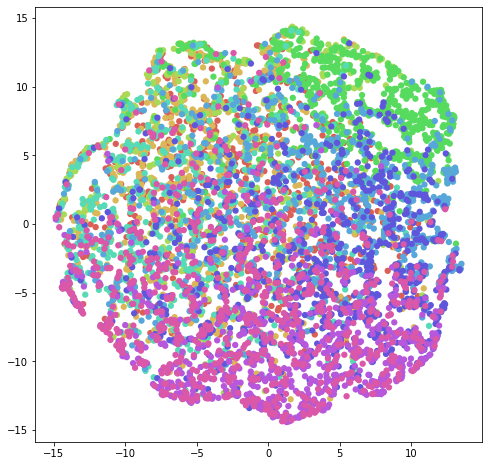

In [ ]:
num_classes = len(np.unique(category_no))
palette = np.array(sns.color_palette("hls", num_classes))

# create a scatter plot.
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(tsne_results[:,0], tsne_results[:,1], lw=0, s=40, c=palette[list(category_no-1)[0:len(category_no)]])
ax.axis('tight')

In [ ]:
plt.subplots(3,3)
sub = []
for name in num_classes:
    ax = ax.scatter(tsne_results[:,0], tsne_results[:,1], lw=0, s=40, c=palette[list(category_no-1)[0:len(category_no)]])
    sub.append(ax)

# content similarity

In [ ]:
https://archive.ics.uci.edu/ml/machine-learning-databases/00432/